In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load your final preprocessed dataset
df = pd.read_csv("heart_selected_features_final.csv")
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Target distribution:\n", df['target'].value_counts())

X = df.drop('target', axis=1)
y = df['target']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Dataset shape: (229, 6)
Columns: ['oldpeak', 'ca', 'cp_0', 'thal_2', 'thal_3', 'target']
Target distribution:
 target
1    133
0     96
Name: count, dtype: int64
Features shape: (229, 5)
Target shape: (229,)


Saving heart_selected_features_final.csv to heart_selected_features_final (4).csv
Dataset shape: (229, 5)
Class distribution:
 target
1    133
0     96
Name: count, dtype: int64
Training samples: 183
Testing samples: 46
MODEL TRAINING AND EVALUATION

----------------------------------------
Training Logistic Regression...
----------------------------------------
Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV Score (F1): 0.8538

Logistic Regression Performance (Test Set):
Accuracy:  0.8696
Precision: 0.8621
Recall:    0.9259
F1 Score:  0.8929
ROC AUC:   0.8616

----------------------------------------
Training SVM...
----------------------------------------
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}
Best CV Score (F1): 0.8702

SVM Performance (Test Set):
Accuracy:  0.8043
Precision: 0.7812
Recall:    0.9259
F1 Score:  0.8475
ROC AUC:   0.7310

----------------------------------------
Training Decision Tree...
-------------------------------

accuracy  precision  recall      f1  roc_auc  \
Logistic Regression    0.8696     0.8621  0.9259  0.8929   0.8616   
KNN                    0.8478     0.8125  0.9630  0.8814   0.8499   
Decision Tree          0.8478     0.8571  0.8889  0.8727   0.8138   
Neural Network         0.8261     0.8065  0.9259  0.8621   0.8577   
SVM                    0.8043     0.7812  0.9259  0.8475   0.7310   

                     best_cv_score  
Logistic Regression         0.8538  
KNN                         0.8683  
Decision Tree               0.8576  
Neural Network              0.8813  
SVM                         0.8702

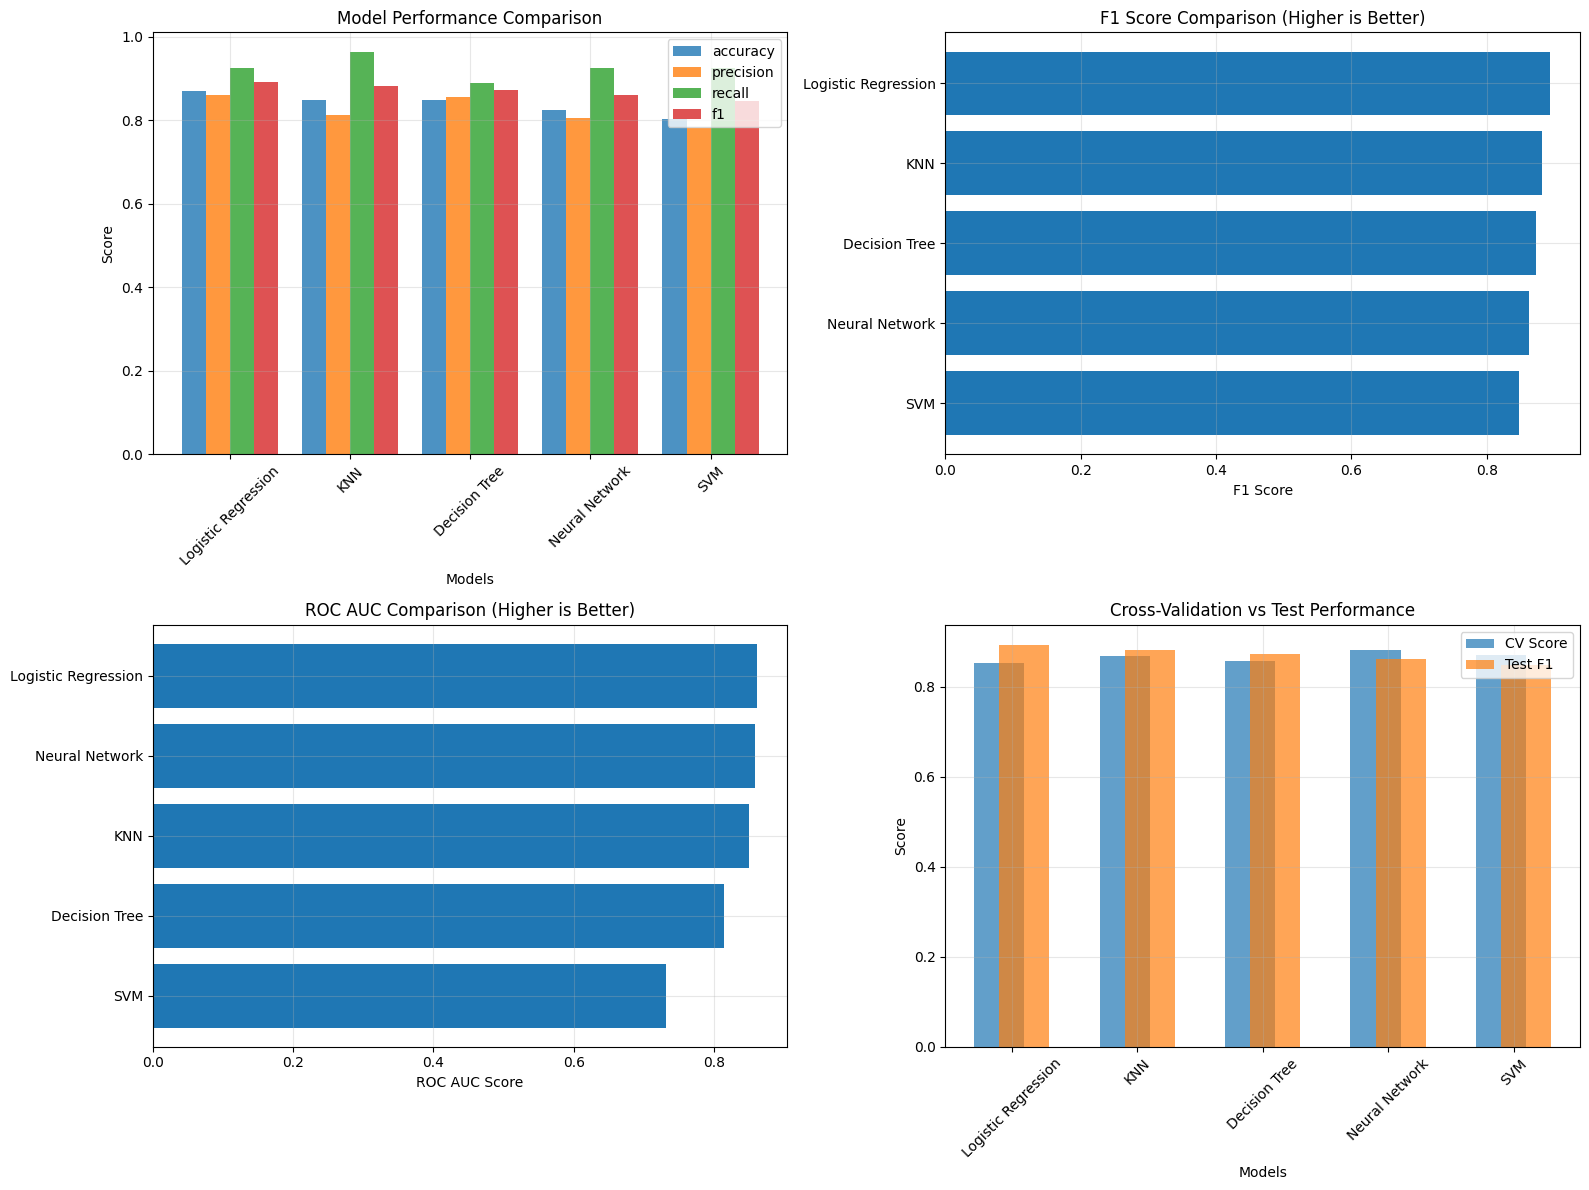


DETAILED MODEL COMPARISON
Best ACCURACY: Logistic Regression (0.8696)
Best PRECISION: Logistic Regression (0.8621)
Best RECALL: KNN (0.9630)
Best F1: Logistic Regression (0.8929)
Best ROC_AUC: Logistic Regression (0.8616)

OVERALL RANKINGS
Overall Ranking (based on average rank across all metrics):
1. Logistic Regression: Average Rank 1.40
2. KNN: Average Rank 2.30
3. Decision Tree: Average Rank 3.30
4. Neural Network: Average Rank 3.40
5. SVM: Average Rank 4.60

SAVING MODELS
✓ No scaler for Logistic Regression
✓ Logistic Regression saved as 'IT24103286_logistic_regression.pkl'
✓ Scaler for SVM saved as 'IT24103890_svm_scaler.pkl'
✓ SVM saved as 'IT24103890_svm.pkl'
✓ No scaler for Decision Tree
✓ Decision Tree saved as 'IT24104335_decision_tree.pkl'
✓ Scaler for KNN saved as 'IT24102854_knn_scaler.pkl'
✓ KNN saved as 'IT24102854_knn.pkl'
✓ Scaler for Neural Network saved as 'IT24102496_neural_network_scaler.pkl'
✓ Neural Network saved as 'IT24102496_neural_network.pkl'

✓ Model comp

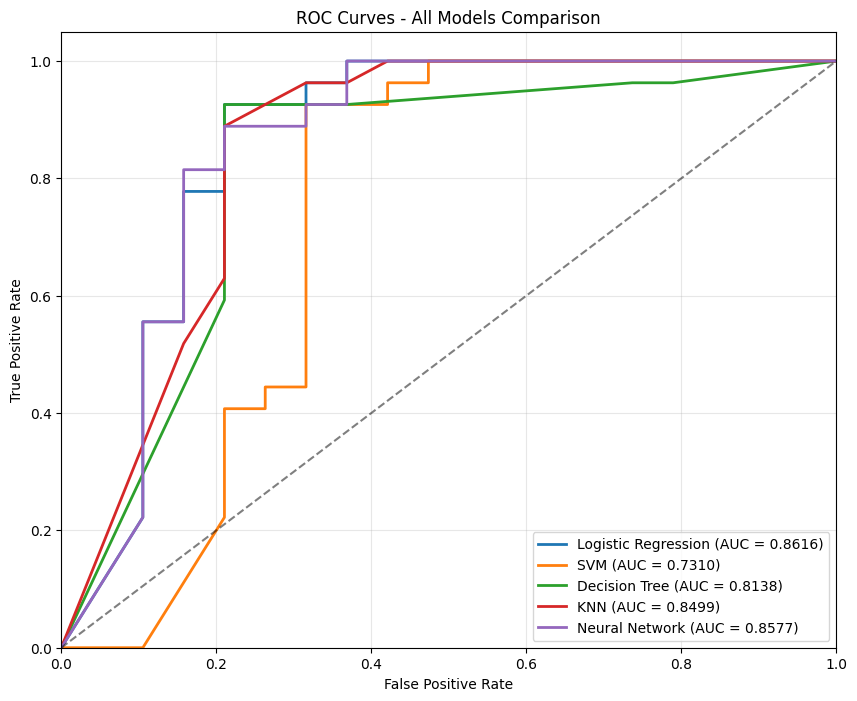

In [ ]:
#Model Comparison
from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                           roc_auc_score, confusion_matrix, classification_report, roc_curve)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import joblib

# Loading the dataset
df = pd.read_csv("heart_selected_features_final.csv")

# Preparing features and target
X = df.drop("target", axis=1)
y = df["target"]

print("Dataset shape:", X.shape)
print("Class distribution:\n", y.value_counts())

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

# Define consistent CV strategy
CV_STRATEGY = 5
cv = StratifiedKFold(n_splits=CV_STRATEGY, shuffle=True, random_state=42)

# Dictionary to store all models and their configurations
models = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42, max_iter=1000),
        'params': {
            "C": [0.001, 0.01, 0.1, 1, 10, 100],
            "penalty": ['l1', 'l2'],
            "solver": ['liblinear']
        },
        'scaler': None
    },
    'SVM': {
        'model': SVC(probability=True, random_state=42),
        'params': {
            "C": [0.1, 1, 10, 100],
            "kernel": ['linear', 'rbf', 'poly'],
            "gamma": ['scale', 'auto', 0.1, 0.01]
        },
        'scaler': StandardScaler()
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            "max_depth": [3, 5, 7, 10, None],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
            "criterion": ['gini', 'entropy']
        },
        'scaler': None
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            "n_neighbors": [3, 5, 7, 9, 11, 15],
            "weights": ['uniform', 'distance'],
            "metric": ['euclidean', 'manhattan', 'minkowski']
        },
        'scaler': StandardScaler()
    },
    'Neural Network': {
        'model': MLPClassifier(random_state=42, max_iter=1000, early_stopping=True),
        'params': {
            "hidden_layer_sizes": [(50,), (100,), (50, 50), (100, 50)],
            "activation": ['relu', 'tanh', 'logistic'],
            "alpha": [0.0001, 0.001, 0.01, 0.1],
            "learning_rate": ['constant', 'adaptive']
        },
        'scaler': StandardScaler()
    }
}

# Storing results
results = {}
trained_models = {}

print("MODEL TRAINING AND EVALUATION")

for name, config in models.items():
    print(f"\n{'-'*40}")
    print(f"Training {name}...")
    print(f"{'-'*40}")

    # Prepare data (scale if needed)
    scaler = None
    if config['scaler'] is not None:
        scaler = config['scaler']
        X_train_processed = scaler.fit_transform(X_train)
        X_test_processed = scaler.transform(X_test)
    else:
        X_train_processed = X_train.copy()
        X_test_processed = X_test.copy()

    # Hyperparameter tuning

    grid = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        scoring="f1",
        cv=CV_STRATEGY,
        n_jobs=-1,
        verbose=0
    )

    grid.fit(X_train_processed, y_train)
    print(f"Best Parameters: {grid.best_params_}")
    print(f"Best CV Score (F1): {grid.best_score_:.4f}")

    # Getting the tuned model
    best_model = grid.best_estimator_

    # Test set evaluation
    y_pred = best_model.predict(X_test_processed)
    y_proba = best_model.predict_proba(X_test_processed)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Store results
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'best_params': grid.best_params_,
        'best_cv_score': grid.best_score_
    }

    trained_models[name] = {
        'model': best_model,
        'scaler': scaler # Store the fitted scaler
    }

    print(f"\n{name} Performance (Test Set):")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(f"ROC AUC:   {roc_auc:.4f}")

print("\n" + "="*50)
print("MODEL COMPARISON SUMMARY")
print("="*50)

# Creating comparison dataframe
comparison_df = pd.DataFrame.from_dict(results, orient='index')
comparison_df = comparison_df[['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'best_cv_score']]
comparison_df = comparison_df.round(4)
comparison_df = comparison_df.sort_values('f1', ascending=False)

print("\nOverall Performance Comparison (sorted by F1 Score):")
display(comparison_df)

# Visualization 1: Performance Comparison Bar Plot
plt.figure(figsize=(16, 12))

# Plot 1: Main metrics comparison
metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1']
x_pos = np.arange(len(comparison_df.index))
width = 0.2

plt.subplot(2, 2, 1)
for i, metric in enumerate(metrics_to_plot):
    plt.bar(x_pos + i*width, comparison_df[metric], width, label=metric, alpha=0.8)

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x_pos + width*1.5, comparison_df.index, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: F1 Score comparison
plt.subplot(2, 2, 2)
plt.barh(range(len(comparison_df)), comparison_df['f1'].sort_values())
plt.yticks(range(len(comparison_df)), comparison_df.sort_values('f1').index)
plt.xlabel('F1 Score')
plt.title('F1 Score Comparison (Higher is Better)')
plt.grid(True, alpha=0.3)

# Plot 3: ROC AUC comparison
plt.subplot(2, 2, 3)
plt.barh(range(len(comparison_df)), comparison_df['roc_auc'].sort_values())
plt.yticks(range(len(comparison_df)), comparison_df.sort_values('roc_auc').index)
plt.xlabel('ROC AUC Score')
plt.title('ROC AUC Comparison (Higher is Better)')
plt.grid(True, alpha=0.3)

# Plot 4: Cross-validation vs Test scores
plt.subplot(2, 2, 4)
plt.bar(x_pos, comparison_df['best_cv_score'], width=0.4, label='CV Score', alpha=0.7)
plt.bar(x_pos + width, comparison_df['f1'], width=0.4, label='Test F1', alpha=0.7)
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Cross-Validation vs Test Performance')
plt.xticks(x_pos + width/2, comparison_df.index, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Detailed comparison table
print("\n" + "="*80)
print("DETAILED MODEL COMPARISON")
print("="*80)

for metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
    best_model = comparison_df[metric].idxmax()
    best_score = comparison_df[metric].max()
    print(f"Best {metric.upper()}: {best_model} ({best_score:.4f})")

print("\n" + "="*80)
print("OVERALL RANKINGS")
print("="*80)

# Calculating overall ranking
rank_columns = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
overall_rank = comparison_df[rank_columns].rank(ascending=False).mean(axis=1).sort_values()

print("Overall Ranking (based on average rank across all metrics):")
for i, (model, rank) in enumerate(overall_rank.items(), 1):
    print(f"{i}. {model}: Average Rank {rank:.2f}")

# Saving all models with proper naming
print("\n" + "="*60)
print("SAVING MODELS")
print("="*60)

# Map models to team members (replace with actual IT numbers)
team_mapping = {
    'Logistic Regression': 'IT24103286_logistic_regression',
    'SVM': 'IT24103890_svm',
    'Decision Tree': 'IT24104335_decision_tree',
    'KNN': 'IT24102854_knn',
    'Neural Network': 'IT24102496_neural_network'
}

for model_name, filename in team_mapping.items():
    # Save model
    joblib.dump(trained_models[model_name]['model'], f'{filename}.pkl')

    # Save scaler if exists
    if trained_models[model_name]['scaler'] is not None:
        scaler_filename = f'{filename}_scaler.pkl'
        joblib.dump(trained_models[model_name]['scaler'], scaler_filename)
        print(f"✓ Scaler for {model_name} saved as '{scaler_filename}'")
    else:
        print(f"✓ No scaler for {model_name}")


    print(f"✓ {model_name} saved as '{filename}.pkl'")

# Save comparison results
comparison_df.to_csv('model_comparison_results.csv')
print("\n✓ Model comparison results saved to 'model_comparison_results.csv'")

# Final summary
print("\n" + "="*60)
print("FINAL SUMMARY")
print("="*60)
print(f"Total models trained and evaluated: {len(models)}")
print(f"Best overall model: {overall_rank.index[0]}")
print(f"Best F1 Score: {comparison_df['f1'].max():.4f}")
print(f"Best Accuracy: {comparison_df['accuracy'].max():.4f}")
print(f"All models and scalers saved successfully!")

# Additional: ROC Curves for all models
plt.figure(figsize=(10, 8))
for name, config in trained_models.items():
    # Use the scaler fitted on the training data for test data
    if config['scaler'] is not None:
        X_test_processed = config['scaler'].transform(X_test)
    else:
        X_test_processed = X_test.copy()

    y_proba = config['model'].predict_proba(X_test_processed)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, linewidth=2, label=f'{name} (AUC = {auc_score:.4f})')

plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - All Models Comparison')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()